Javier Francisco Castilla Jiménez
* Ejercicios 7, 8 y 9
* Práctica 1

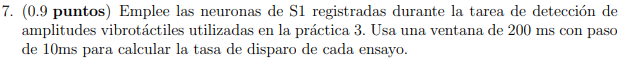

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import NeuralFunctJC as nrn
plt.style.use('Solarize_Light2')
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2]:
neuronas=['A','B','C','D','E']
amplitudes=(0,6,8,10,12,24)

In [3]:
NeuDetS1A=nrn.importar('Neu_Det_S1A.csv')
NeuDetS1B=nrn.importar('Neu_Det_S1B.csv')
NeuDetS1C=nrn.importar('Neu_Det_S1C.csv')
NeuDetS1D=nrn.importar('Neu_Det_S1D.csv')
NeuDetS1E=nrn.importar('Neu_Det_S1E.csv')
Neurons={'A':NeuDetS1A,'B':NeuDetS1B,'C':NeuDetS1C,'D':NeuDetS1D,'E':NeuDetS1E}

########################################################################

bqA=list((nrn.bloques(nrn.abrir('Neu_Det_S1A.csv'))))
bqB=list((nrn.bloques(nrn.abrir('Neu_Det_S1B.csv'))))
bqC=list((nrn.bloques(nrn.abrir('Neu_Det_S1C.csv'))))
bqD=list((nrn.bloques(nrn.abrir('Neu_Det_S1D.csv'))))
bqE=list((nrn.bloques(nrn.abrir('Neu_Det_S1E.csv'))))

bqs={'A':bqA,'B':bqB,'C':bqC,'D':bqD,'E':bqE}

In [4]:
bqs

{'A': [50, 10, 10, 10, 10, 10],
 'B': [50, 9, 10, 10, 10, 10],
 'C': [50, 9, 10, 10, 10, 10],
 'D': [34, 7, 7, 6, 6, 7],
 'E': [49, 10, 10, 10, 10, 10]}

In [52]:
def dicneuronrate(dictneu,keyneuron,start=-1,stop=3,paso=0.01,ventana=0.2,nv=True):
    """
    Esta función crea un diccionario donde las claves son los nombres de las neuronas y los valores
    son las tasas de disparo de cada neurona. 
    keyneurons:son las claves/llaves de cada neurona. Es una lista. o tupla.
    dictneu:es un diccionario dónde las llaves son keyneurons y los valores son los 
    datos crudos de todos los ensayos de una neurona
    salida es un diccionario."""
    Tns={clave:0 for clave in keyneuron}
    bsup,nven=nrn.bordesup(start,stop,paso,ventana,nv=True) 
    func=lambda ensayo : nrn.tasa(ensayo,nventanas=nven,paso=paso,ventana=ventana,start=start)# esta función calcula la tasa de disparo de un ensayo nventanas, paso=0.01,ventana=0.05,start=-2 
    for llave in keyneuron:
        fr=map(func,dictneu[llave]) # array con las tasas de disparo para cada ventana
        Tns[llave]=np.array(list(fr))
    return Tns

In [80]:
def txclases(tasas,keyneuron,bqs):
    """tasas"""
    #tasas de disparo separadas por amplitud del estímulo en un diccionario de diccionarios
    Txclases={a:0 for a in keyneuron}
    for llave in keyneuron:
        bloques=nrn.clases(tasas[llave],bqs[llave])
        #clases={keyclases[i]:bloques[i] for i in range(len(keyclases))}
        Txclases[llave]=bloques
    return Txclases

In [54]:
Tns1=dicneuronrate(Neurons,neuronas)
txclas=txclases(Tns1,neuronas,bqs)

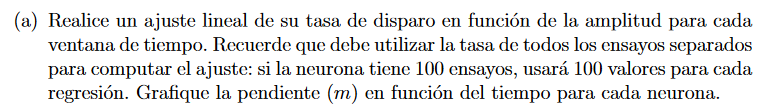

In [55]:
def t_promxclas(tasaxclases,keycondiciones):
    ncondiciones=len(keycondiciones)
    medias=[]
    for i in range(ncondiciones):
        media=np.mean(tasaxclases[i],axis=0)
        medias.append(media)
    medias=np.vstack(medias)
    return medias 

In [56]:
def txc(tprmxclas):
    nv=len(tprmxclas[0])
    tfamp=[]
    for i in range(nv):
        tfamp.append(tprmxclas[:,i])
    tfamp=np.vstack(tfamp)
    return tfamp
        

In [57]:
def ajuste_lineal(txclas,amplitudes):
    tpromxclas=t_promxclas(txclas,amplitudes)
    tfamp=txc(tpromxclas)
    pendientes=[]
    for i in range(len(tfamp)):
        y=tfamp[i]
        x=np.array(amplitudes).reshape((-1,1))
        model = LinearRegression(n_jobs=-1).fit(x,y)
        pendientes.append(model.coef_)
    pendientes=np.array(pendientes)
    return pendientes

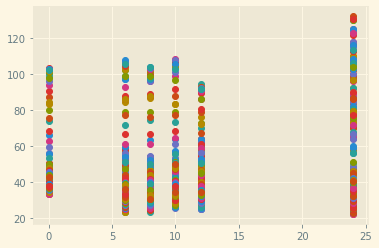

In [10]:
tpromc=t_promxclas(txclas['A'],amplitudes)
tfamp=txc(tpromc)
for i in range(len(tfamp)):
    plt.scatter(np.array(amplitudes),tfamp[i])

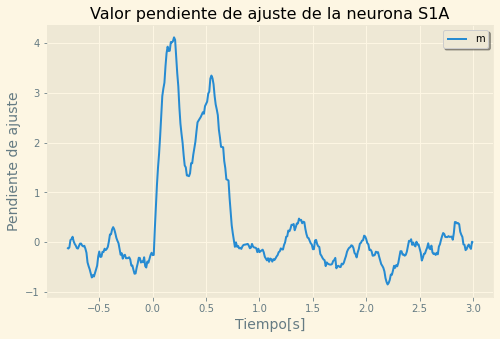

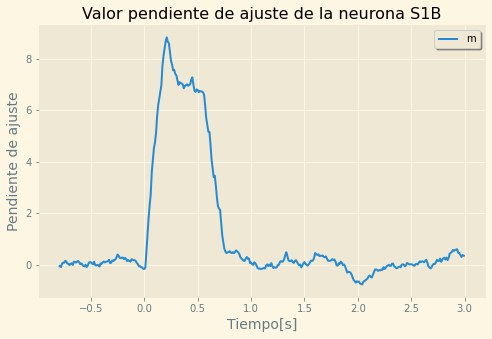

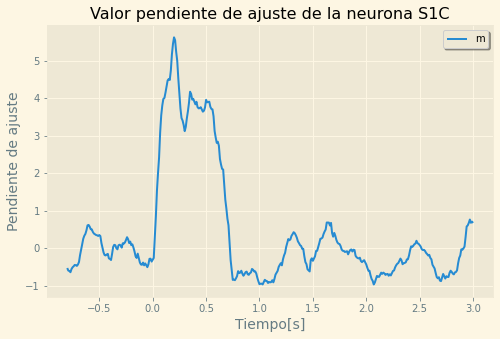

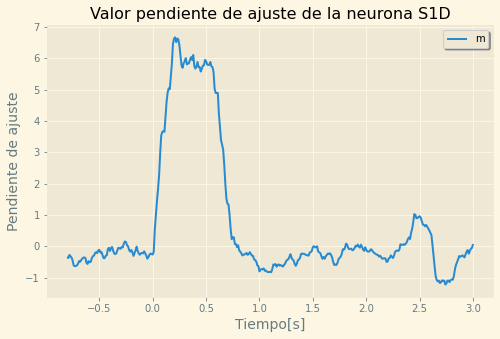

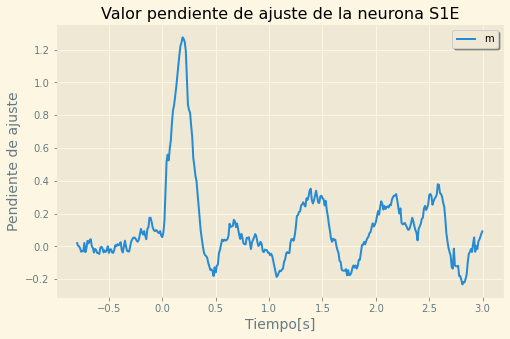

In [11]:
ajuste=dict()
bsup,nven=nrn.bordesup(start=-1,stop=3,paso=0.01,ventana=0.2,nv=True) 
for llave in neuronas:
    pendiente=ajuste_lineal(txclas[llave],amplitudes)
    ajuste.update({llave:pendiente})
    ######## Figura
    fig = plt.figure(figsize=(8,5))
    plt.plot(bsup,pendiente,label='m')
    plt.xlabel("Tiempo[s]",fontsize=14)
    plt.ylabel("Pendiente de ajuste",fontsize=14)
    plt.title("Valor pendiente de ajuste de la neurona S1"+llave)
    plt.legend(fontsize="medium",shadow=True,fancybox=True)
    plt.show()

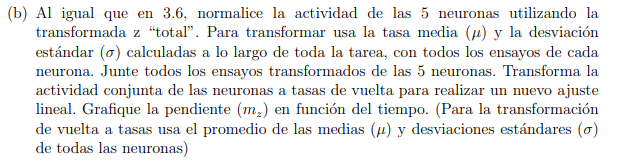

In [58]:
def zscoreTotal(tasa):
    media=np.mean(tasa)
    sigma=np.std(tasa)
    z=(tasa-media)/sigma
    return media,sigma,z

In [59]:
# No tiene los mismos tamaños 
mpobla,spobla,zprom=0,0,0
Zns1=dict()
for llave in neuronas:
    mu,sg,z=zscoreTotal(Tns1[llave])
    mpobla+=mu
    spobla+=sg
    zprom+=z
spobla=spobla/len(neuronas)
mpobla=mpobla/len(neuronas)
zprom=zprom/len(neuronas)

ValueError: operands could not be broadcast together with shapes (100,381) (99,381) (100,381) 

In [60]:
def tasapobla(tasa,keyneuron,amplitudes,bqs):
    neuronas=keyneuron
    mpobla,spobla=0,0
    Zns1=dict()
    for llave in neuronas:
        mu,sg,z=zscoreTotal(Tns1[llave])
        mpobla+=mu
        spobla+=sg
        Zns1.update({llave:z})
    spobla=spobla/len(neuronas)
    mpobla=mpobla/len(neuronas)
    ######parte 2
    Zxclas=txclases(Zns1,neuronas,bqs)
    Zpromxc=[]
    for i in range(len(amplitudes)):
        clase=[]
        for neurona in neuronas:
            clase.append(Zxclas[neurona][i])
        clase=np.vstack(clase)
        Zpromxc.append(clase)
    ###########################PARTE3
    zprom=[]
    for i in range(len(amplitudes)):
        clase=np.mean(Zpromxc[i],axis=0)
        zprom.append(clase)
    zprom=np.vstack(zprom)/len(neuronas)
    tasapoblacional=np.array((zprom*spobla)+mpobla)
    return tasapoblacional

In [61]:
mpobla,spobla=0,0
Zns1=dict()
for llave in neuronas:
    mu,sg,z=zscoreTotal(Tns1[llave])
    mpobla+=mu
    spobla+=sg
    Zns1.update({llave:z})
spobla=spobla/len(neuronas)
mpobla=mpobla/len(neuronas)
#zprom=zprom/len(neuronas)

In [62]:
Zxclas=txclases(Zns1,neuronas,bqs)

Zpromxc=[]
for i in range(len(amplitudes)):
    clase=[]
    for neurona in neuronas:
        clase.append(Zxclas[neurona][i])
    clase=np.vstack(clase)
    Zpromxc.append(clase)
###########################
zprom=[]
for i in range(len(amplitudes)):
    clase=np.mean(Zpromxc[i],axis=0)
    zprom.append(clase)
zprom=np.vstack(zprom)/len(neuronas)

In [63]:
tasapoblacional=np.array((zprom*spobla)+mpobla)

In [64]:
len(tasapoblacional[0])

381

In [139]:
def ajuste_lineal2(tpromxclas,amplitudes):
    tfamp=txc(tpromxclas)
    pendientes=[]
    for i in range(len(tfamp)):
        y=tfamp[i]
        x=np.array(amplitudes).reshape((-1,1))
        model = LinearRegression(n_jobs=-1).fit(x,y)
        pendientes.append(model.coef_)
    pendientes=np.hstack(pendientes)
    return pendientes

In [135]:
pendiente=ajuste_lineal2(tasapoblacional,amplitudes)

In [136]:
pendiente_tp=ajuste_lineal2(tasapoblacional,amplitudes)

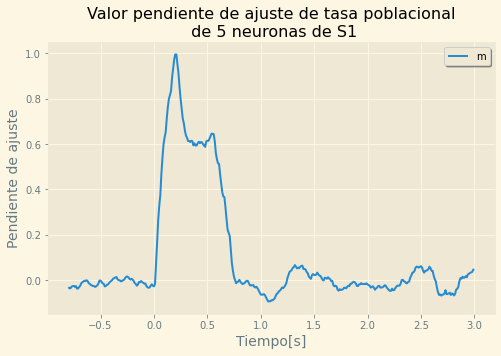

In [84]:
bsup,nven=nrn.bordesup(start=-1,stop=3,paso=0.01,ventana=0.2,nv=True) 
######## Figura
fig = plt.figure(figsize=(8,5))
plt.plot(bsup,pendiente,label='m')
plt.xlabel("Tiempo[s]",fontsize=14)
plt.ylabel("Pendiente de ajuste",fontsize=14)
plt.title("Valor pendiente de ajuste de tasa poblacional\n de 5 neuronas de S1")
plt.legend(fontsize="medium",shadow=True,fancybox=True)
plt.show()

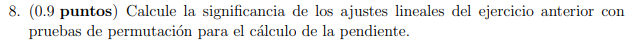

In [16]:
def permutacion(data,nperm=1000):
    """
    esta función permuta los datos de las tasa de disparo de una neurona y guarda 
    en una lista las permutaciones donde cada elemento de las lista es una permutación 
    de los datos
    """
    forma=data.shape
    ndat=forma[0]*forma[1]
    aplana=data.flatten()
    permutaciones=[aplana[np.random.permutation(ndat)].reshape(forma) for i in range(nperm)]
    return permutaciones

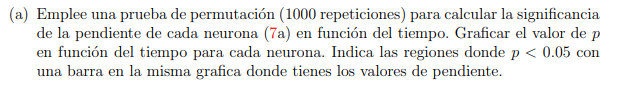

In [23]:
def Alineal_permutados(data,bqs,condiciones,nperm=1000):
    pr_Al=[]
    permutaciones=permutacion(data,nperm)
    for b in range(nperm):
        tasapxc=nrn.clases(permutaciones[b],bqs)
        pr_Al.append(ajuste_lineal(tasapxc,condiciones))
    pr_Al=np.stack(pr_Al)
    return pr_Al

In [27]:
len(ajuste['A'])

381

In [24]:
bsup,nven=nrn.bordesup(start=-1,stop=3,paso=0.01,ventana=0.2,nv=True) 
pes=dict()
for llave in neuronas:
    Al_real=ajuste[llave]
    Al_permutada=Alineal_permutados(Tns1[llave],bqs[llave],amplitudes)
    p=np.sum(Al_permutada>Al_real,axis=0)/len(Al_permutada)
    pes.update({llave:p})

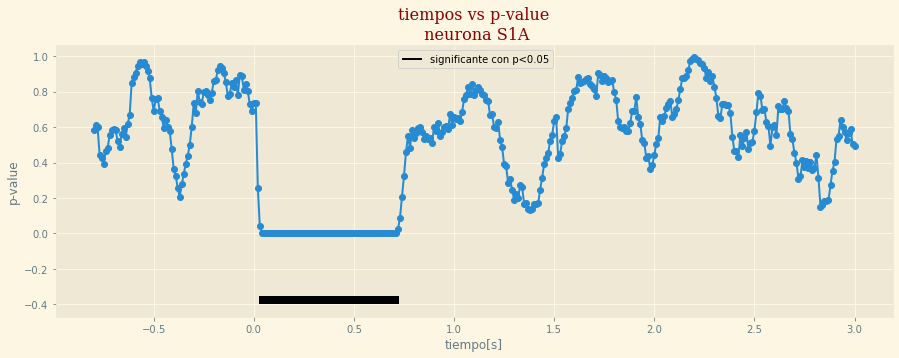

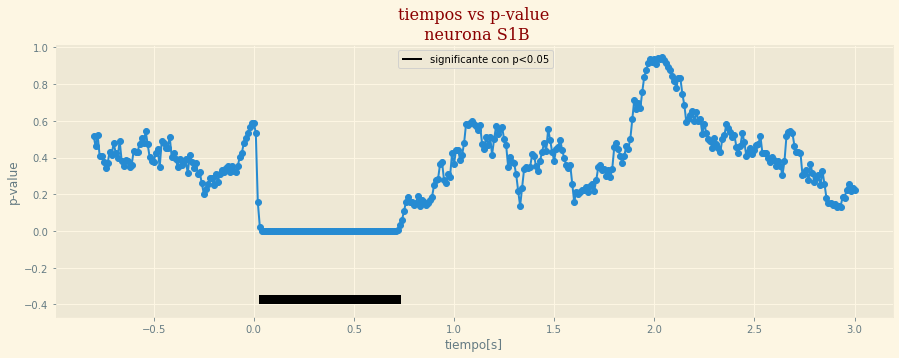

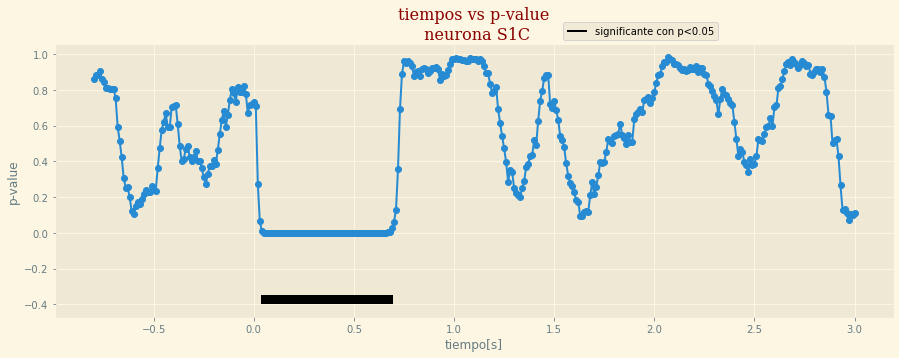

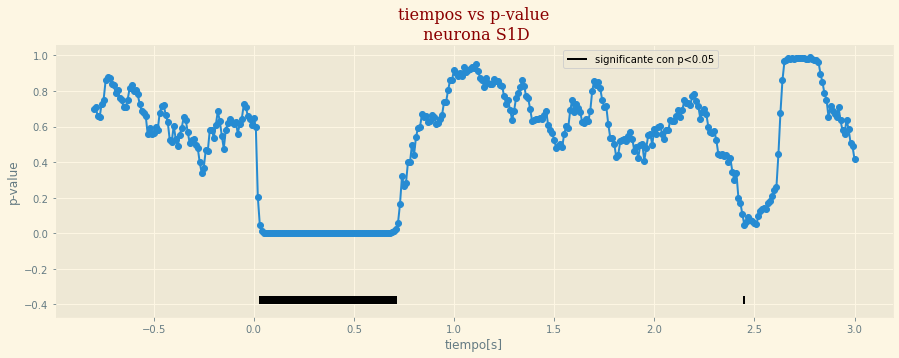

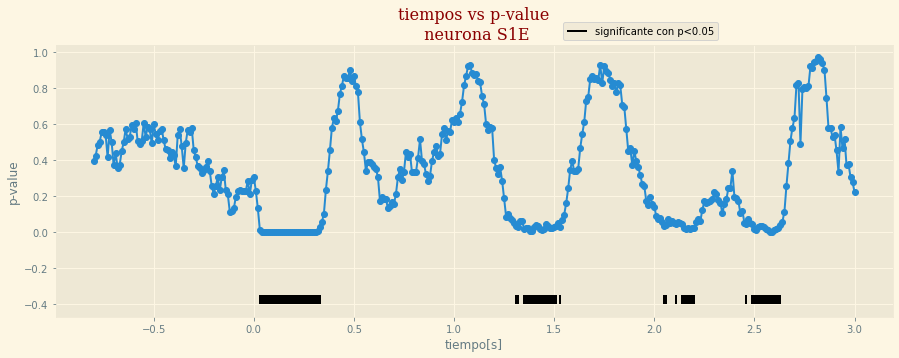

In [39]:
bsup1,nven=nrn.bordesup(start=-1,stop=3,paso=0.01,ventana=0.2,nv=True)
for llave in neuronas:
    Tsignificantes=bsup1[np.where(pes[llave].reshape((nven,))<0.05)]
    fontdict_title = {'family': 'serif','color':  'darkred','weight': 'normal','size': 16,} # formato para el título
    fig,(ax1)=plt.subplots(nrows=1,ncols=1,sharex=False,figsize=(15,5))
    ax1.scatter(bsup1,pes[llave])
    ax1.plot(bsup1,pes[llave])
    ax1.vlines(Tsignificantes,-0.35,-0.40,linestyles ="solid", colors ="black",label='significante con p<0.05')
    ax1.set_ylabel('p-value')
    ax1.set_xlabel('tiempo[s]')
    ax1.set_title('tiempos vs p-value\n neurona S1'+llave, fontdict_title) 
    ax1.legend(loc='best', bbox_to_anchor=(0.6, 1))

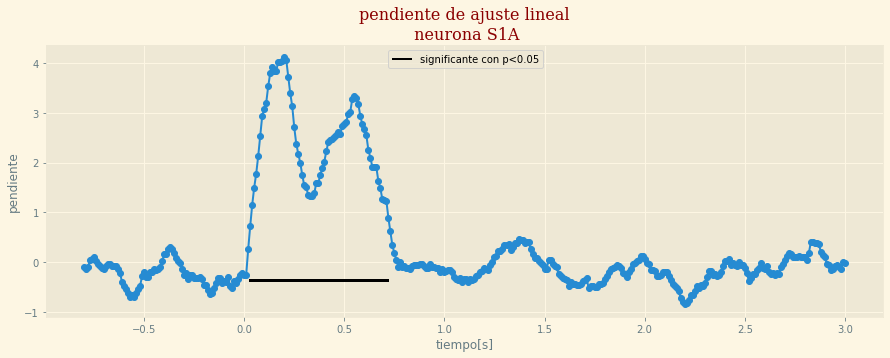

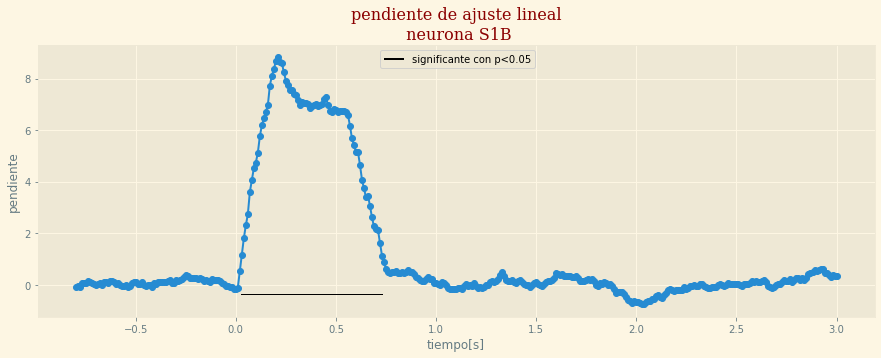

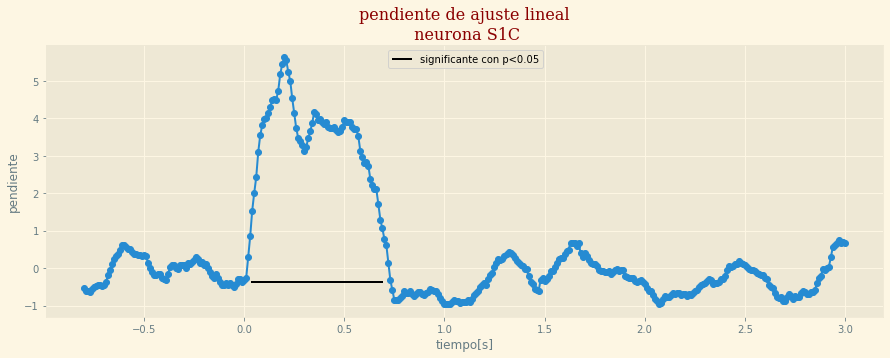

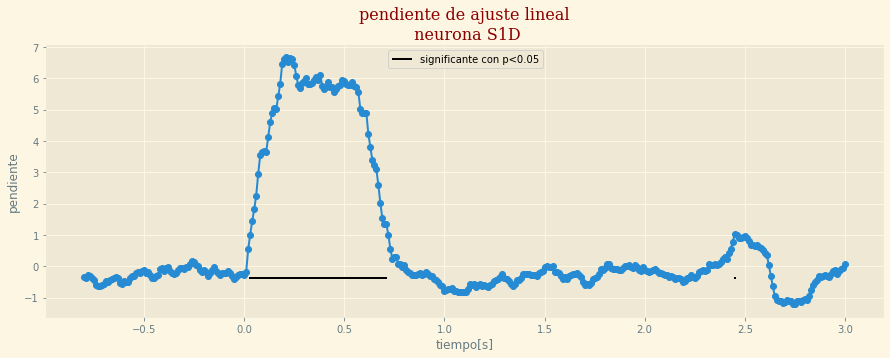

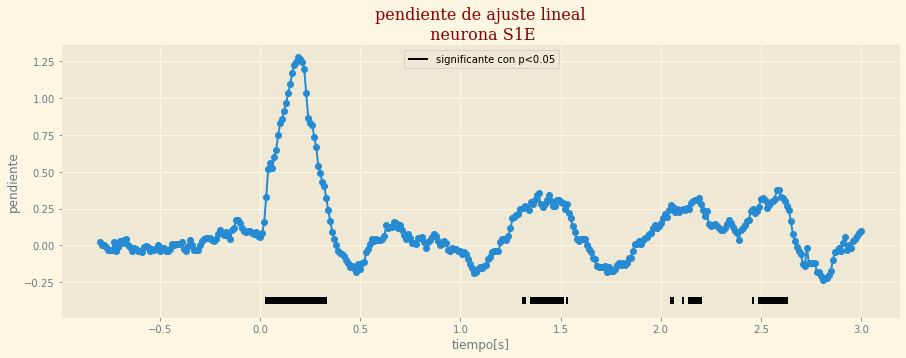

In [40]:
bsup,nven=nrn.bordesup(start=-1,stop=3,paso=0.01,ventana=0.2,nv=True) 
for llave in neuronas:
    ######## Figura
    Tsignificantes=bsup[np.where(pes[llave].reshape((nven,))<0.05)]
    fontdict_title = {'family': 'serif','color':  'darkred','weight': 'normal','size': 16,} # formato para el título
    fig,(ax1)=plt.subplots(nrows=1,ncols=1,sharex=False,figsize=(15,5))
    ax1.scatter(bsup,ajuste[llave])
    ax1.plot(bsup,ajuste[llave])
    ax1.vlines(Tsignificantes,-0.35,-0.40,linestyles ="solid", colors ="black",label='significante con p<0.05')
    ax1.set_ylabel('pendiente')
    ax1.set_xlabel('tiempo[s]')
    ax1.set_title('pendiente de ajuste lineal\n neurona S1'+llave, fontdict_title) 
    ax1.legend(loc='best', bbox_to_anchor=(0.6, 1))

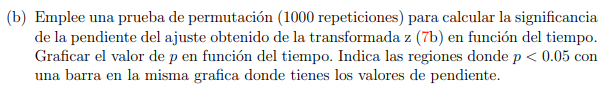

In [140]:
def ajuste_lineal2(tpromxclas,amplitudes):
    tfamp=txc(tpromxclas)
    pendientes=[]
    for i in range(len(tfamp)):
        y=tfamp[i]
        x=np.array(amplitudes).reshape((-1,1))
        model = LinearRegression(n_jobs=-1).fit(x,y)
        pendientes.append(model.coef_)
    pendientes=np.hstack(pendientes)
    return pendientes

In [81]:
def txclases(tasas,keyneuron,bqs):
    """tasas"""
    #tasas de disparo separadas por amplitud del estímulo en un diccionario de diccionarios
    Txclases={a:0 for a in keyneuron}
    for llave in keyneuron:
        bloques=nrn.clases(tasas[llave],bqs[llave])
        #clases={keyclases[i]:bloques[i] for i in range(len(keyclases))}
        Txclases[llave]=bloques
    return Txclases

In [167]:
def tasapobla(tasa,neuronas,amplitudes,bqs):
    
    mpobla,spobla=0,0
    Zns1=dict()
    for llave in neuronas:
        mu,sg,z=zscoreTotal(tasa[llave])
        mpobla+=mu
        spobla+=sg
        Zns1.update({llave:z})
    spobla=spobla/len(neuronas)
    mpobla=mpobla/len(neuronas)
    ######parte 2
    Zxclas=txclases(Zns1,neuronas,bqs)
    Zpromxc=[]
    for i in range(len(amplitudes)):
        clase=[]
        for neurona in neuronas:
            clase.append(Zxclas[neurona][i])
        clase=np.vstack(clase)
        Zpromxc.append(clase)
    ###########################PARTE3
    zprom=[]
    for i in range(len(amplitudes)):
        clase=np.mean(Zpromxc[i],axis=0)
        zprom.append(clase)
    zprom=np.vstack(zprom)/len(neuronas)
    tasapoblacional=np.array((zprom*spobla)+mpobla)
    return tasapoblacional

In [168]:
len(tasapobla(Tns1,neuronas,amplitudes,bqs))

6

In [169]:
 permutaciones={n:permutacion(Tns1[n],1000) for n in neuronas}

In [165]:
Tns1_perm=dict()
for n in neuronas:
    Tns1_perm.update({n:permutaciones[n][0]})
    

In [166]:
tasapobla(Tns1_perm,neuronas,amplitudes,bqs)

array([[35.41622004, 35.37940866, 35.4062172 , ..., 35.05538321,
        34.84587422, 34.81544349],
       [35.37432766, 35.41615758, 35.34059498, ..., 34.32560157,
        34.34113513, 34.20077624],
       [34.23155556, 34.02712267, 33.84527529, ..., 34.91290523,
        34.76517702, 34.60978577],
       [34.63188242, 34.77363411, 34.71654073, ..., 34.51961399,
        34.42283883, 34.44480451],
       [35.46134934, 35.37950698, 35.15666614, ..., 34.72486353,
        34.87253059, 34.84331996],
       [34.52600799, 34.35908309, 34.388813  , ..., 35.70114625,
        35.73056875, 35.7062473 ]])

In [170]:
def Alineal_permutados2(data,bqs,neuronas,condiciones,nperm=1000):
    """
    data es un diccionario de neuronas
    """
    pr_Al=[]
    permutaciones={n:permutacion(data[n],nperm) for n in neuronas}
    for b in range(nperm):
        Tns1_perm={n:permutaciones[n][b] for n in neuronas}
        tasapoblacion=tasapobla(Tns1_perm,neuronas,condiciones,bqs)
        pr_Al.append(ajuste_lineal2(tasapoblacion,condiciones))
    pr_Al=np.stack(pr_Al)
    return pr_Al

In [171]:
bsup2,nven2=nrn.bordesup(start=-1,stop=3,paso=0.01,ventana=0.2,nv=True) 
Al_real=pendiente_tp
Al_permutada=Alineal_permutados2(Tns1,bqs,neuronas,amplitudes)
p2=np.sum(Al_permutada>Al_real,axis=0)/len(Al_permutada)


In [116]:
len(Al_permutada[0])

1000

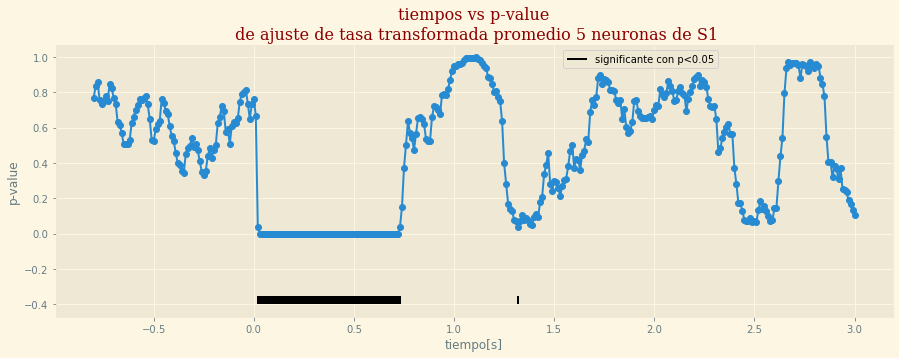

In [178]:
bsup2,nven2=nrn.bordesup(start=-1,stop=3,paso=0.01,ventana=0.2,nv=True)

Tsignificantes=bsup2[np.where(p2.reshape((nven2,))<0.05)]
fontdict_title = {'family': 'serif','color':  'darkred','weight': 'normal','size': 16,} # formato para el título
fig,(ax1)=plt.subplots(nrows=1,ncols=1,sharex=False,figsize=(15,5))
ax1.scatter(bsup2,p2)
ax1.plot(bsup2,p2)
ax1.vlines(Tsignificantes,-0.35,-0.40,linestyles ="solid", colors ="black",label='significante con p<0.05')
ax1.set_ylabel('p-value')
ax1.set_xlabel('tiempo[s]')
ax1.set_title('tiempos vs p-value\n de ajuste de tasa transformada promedio 5 neuronas de S1', fontdict_title) 
ax1.legend(loc='best', bbox_to_anchor=(0.6, 1))

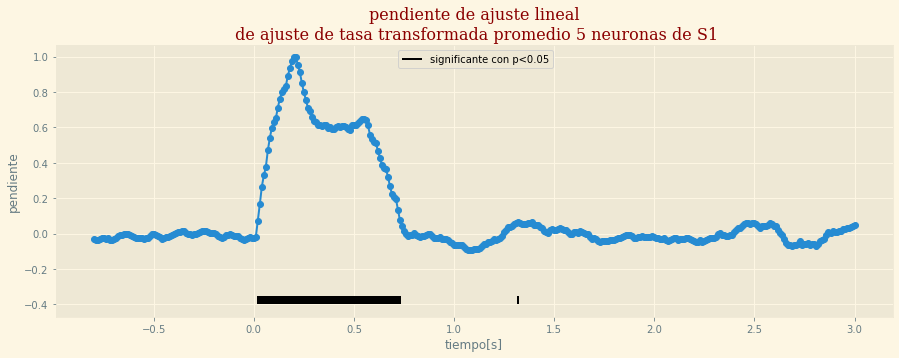

In [179]:
    ######## Figura
Tsignificantes=bsup[np.where(p2.reshape((nven2,))<0.05)]
fontdict_title = {'family': 'serif','color':  'darkred','weight': 'normal','size': 16,} # formato para el título
fig,(ax1)=plt.subplots(nrows=1,ncols=1,sharex=False,figsize=(15,5))
ax1.scatter(bsup2,pendiente_tp)
ax1.plot(bsup2,pendiente_tp)
ax1.vlines(Tsignificantes,-0.35,-0.40,linestyles ="solid", colors ="black",label='significante con p<0.05')
ax1.set_ylabel('pendiente')
ax1.set_xlabel('tiempo[s]')
ax1.set_title('pendiente de ajuste lineal\n de ajuste de tasa transformada promedio 5 neuronas de S1', fontdict_title) 
ax1.legend(loc='best', bbox_to_anchor=(0.6, 1))

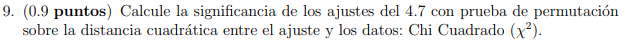

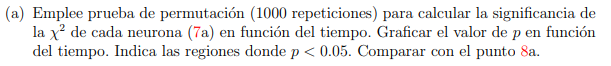

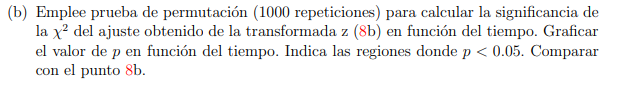